### 数据分析思路
- 提出问题
- 获取数据
- 整理分析
- 作出结论

## My First Activity
As a beginner, I started with the 'Python for AI and Machine learning Bootcamp' course on Udemy. As suggested by the Professor of the course, I also started to read the book 'Introduction to Statistical Learning' in parallel. This combination gave me a good insight into AI, ML and helped me quickly move towards practical coding using Python. Rather than looking for more videos and sessions, I thought to start with implementing something, so that, along the road I can step by step explore the areas as encountered. There are numerous possible paths in AI/ML. But I chose to first pick up a data set and then see what I can do with it.

## Picked up a dataset
Kaggle is a very good place to find numerous datasets. I browsed some data sets and picked the Black Friday dataset.
https://www.kaggle.com/mehdidag/black-friday

In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

# Any results you write to the current directory are saved as output.

['第六课：numpy_scipy.ipynb', '第五课：文件操作和时间处理.ipynb', '第四课：pandas处理表格数据.ipynb', 'output_27_1.png', 'Untitled.ipynb', 'pandas处理表格数据_files', 'insure_head', 'titanic_data2.csv', 'titanic_data3.csv', 'black-friday.zip', 'output_31_1.png', 'README.md', 'output_28_1.png', '第二-三课：python基础.ipynb', 'pandas处理表格数据.tex', 'titanic_data.csv', '后续课程展望.ipynb', '.ipynb_checkpoints', '第一课：课程简介.ipynb', 'pandas_demo.ipynb', 'Python课程复盘学习.ipynb', '.git', 'output_29_1.png', 'notebook.tex', '第七课：数据分析案例.ipynb', 'BlackFriday.csv']


In [20]:
##reading the data 
df = pd.read_csv('./BlackFriday.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


There are 12 columns with different formats of data in each column.

In [4]:
df.head(5)
## Looks like we have some null/NaN values in the product categories.

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


After having a look at the data columns, I began to first think what could be the use cases of using such dataset in AI/ML.
	
## I listed down the use cases I could think of..
	- Analyzing data for research 
		○ Who is more likely to spend more in a black Friday sale?
			§ Men or Women.
			§ Married or Un Married
			§ Old Residents or new residents 
		○ Which type of products are more likely to be sold in a sale like black Friday?
        ○ Which type of products are common among men and which among women?
	- Prediction/classification-
		○ Predict Age of a customer based on the rest of available data.
		○ Predict gender of a customer based on rest of data.
		○ Predict amount of purchase based on rest of data.
     - Recommendation -
         ○ Suggest products based on age.
         ○ Suggest products based on location customers belong to.
         ○ Suggest products based on gender.

***However, without exploratory data analysis and data visualization, we cannot tell if the given data will help with these use cases. Only if the relevant columns have a correlation, those will be helpful to predict/conclude the cases.***

I would try to plot a few columns. But, before that, I need to clean the null values.

In [5]:
## to check which columns have null values.
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

So looks like Product_Category_2 and Product_Category_3 have some null values. 
We could check their unique values and then assign a default value accordingly for NaNs

In [6]:
print('Product_Category_2', df['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', df['Product_Category_3'].unique())

Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
-----------------------------------------------------------------------------------
Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [7]:
## So all values are in integer range. May be we can assign value zero for the NaN cases
df.fillna(value=0,inplace=True)
## Also looks like the product categories are float while they can be int.
df["Product_Category_2"] = df["Product_Category_2"].astype(int)
df["Product_Category_3"] = df["Product_Category_3"].astype(int)
print('Product_Category_2', df['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', df['Product_Category_3'].unique())

Product_Category_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
-----------------------------------------------------------------------------------
Product_Category_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


In [8]:
## We might not need product Id and user Id hence dropping them
df.drop(columns = ["User_ID","Product_ID"],inplace=True)
## need to always remember to use inplace to make the changes in current data frame

Looking at below count plot, looks like very less number of females attended the black friday sale. 
But it could also mean less number of females paid for the products and may be their spouse paid for them.<br>
为什么男人付钱比女人多？因为夫妻两个人一起来，丈夫买单

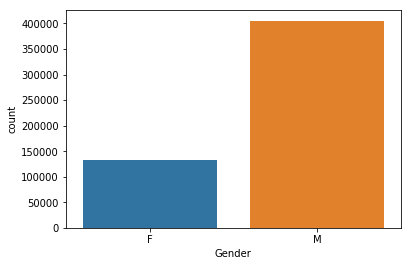

In [9]:
sns.countplot(df['Gender'])

Now, on plotting a count plot for age, seems like the majority of the population in the ages group 26-35 attended the sale.

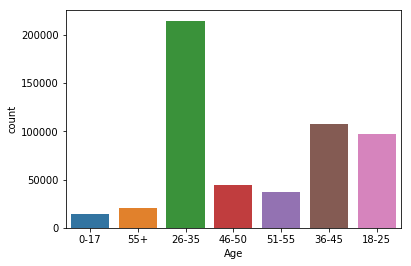

In [10]:
sns.countplot(df['Age'])

Further, I could also check among the age groups, which gender was a majority by adding a hue.
And as seen below, more males spent in the sale than females.

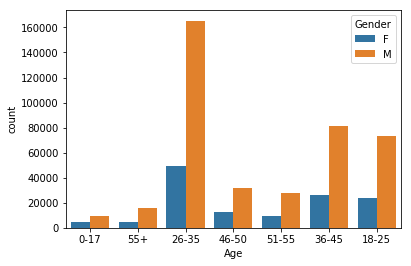

In [11]:
sns.countplot(df['Age'],hue=df['Gender'])

May be we could check further - how many of these males were actually married?
For this lets create a column that represents gender+married status and then use it as hue.

In [12]:
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


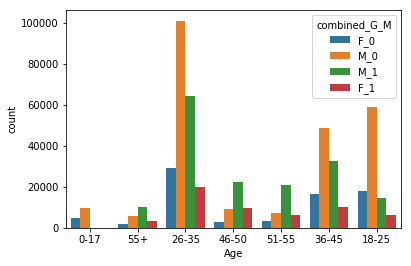

In [13]:
sns.countplot(df['Age'],hue=df['combined_G_M'])

As we see above, there are no bars for the married in the 0-17 range which makes sense. And then if we look at the 46 and above groups, females are very less. But on the other hand, married males paying in range 46-55 are also comparatively more than married females. So it could also imply that though ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more.
If we had more categorical data defining what kind of products were purchased by men, we could dig in this statement further. However, since in this dataset we don't know if there is a category that implies feminine products/clothes we cannot further explore this case.

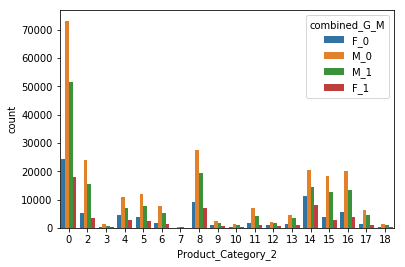

In [14]:
sns.countplot(df['Product_Category_2'],hue=df['combined_G_M'])

Even below plots don't provide any hint of whether some products are particularly being purchased by either females or married males.

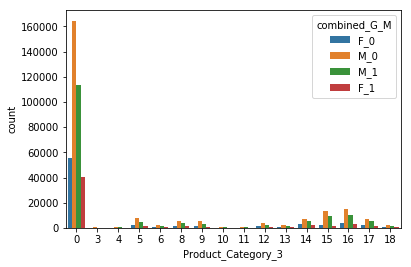

In [15]:
sns.countplot(df['Product_Category_3'],hue=df['combined_G_M'])

Let us check back rest of the columns again to see what next we could explore.

In [16]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'combined_G_M'],
      dtype='object')

In [67]:
df_by_occupation_and_categories = df.groupby(['Occupation','Product_Category_1']).count().reset_index('Product_Category_1')

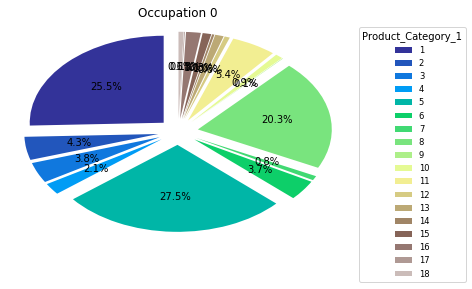

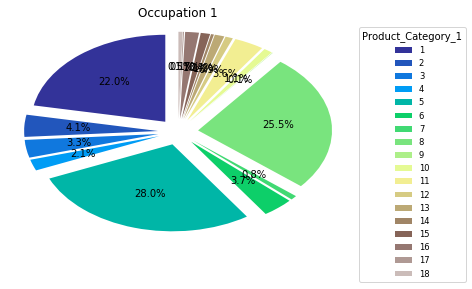

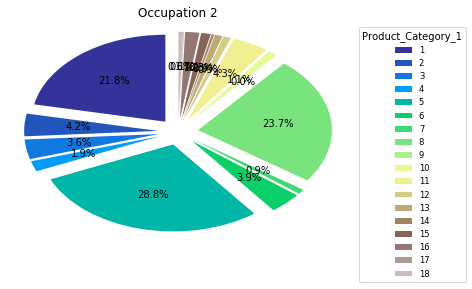

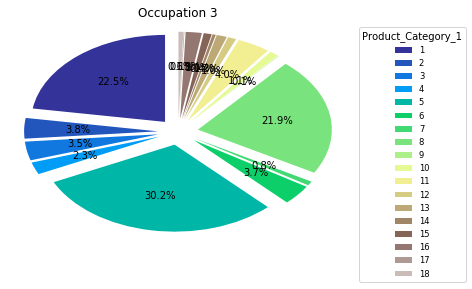

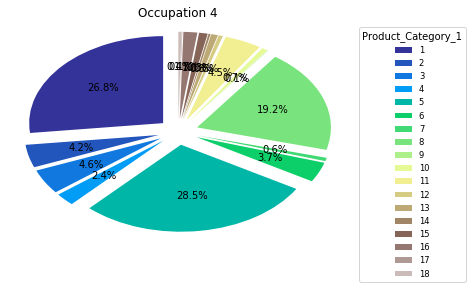

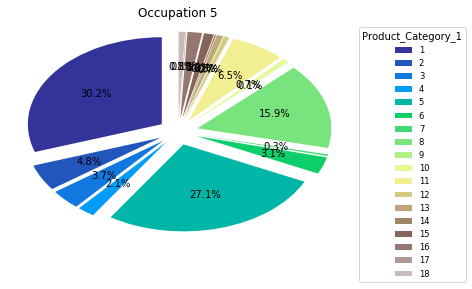

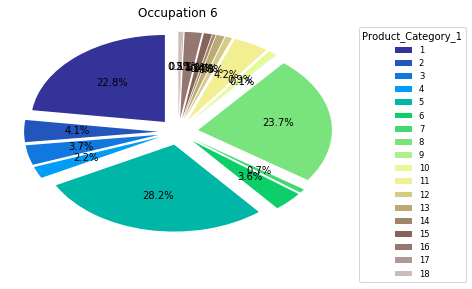

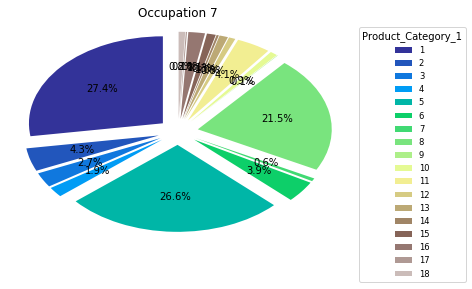

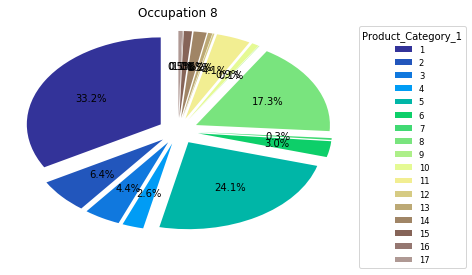

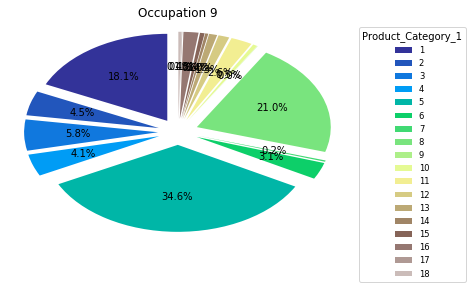

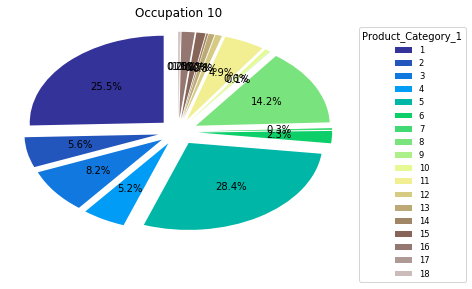

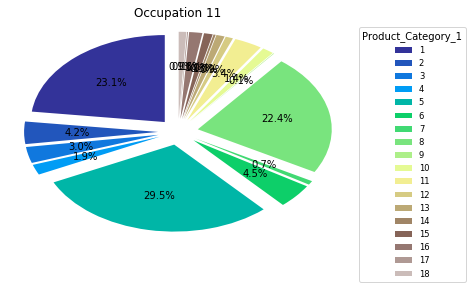

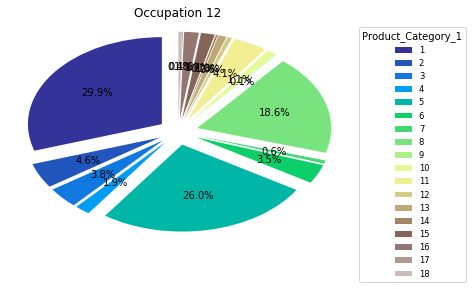

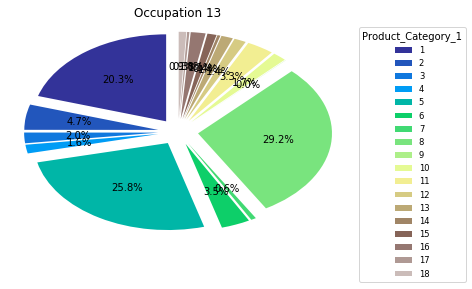

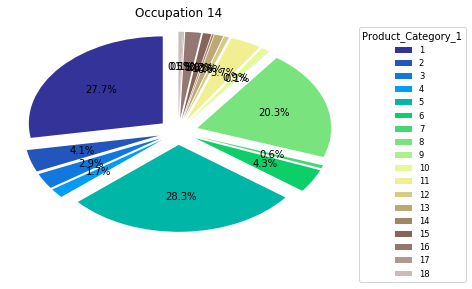

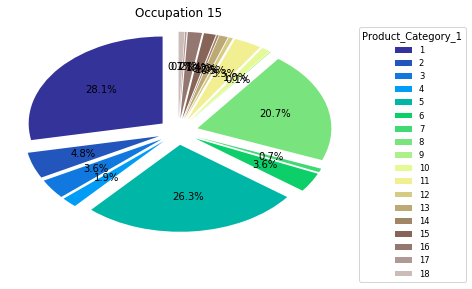

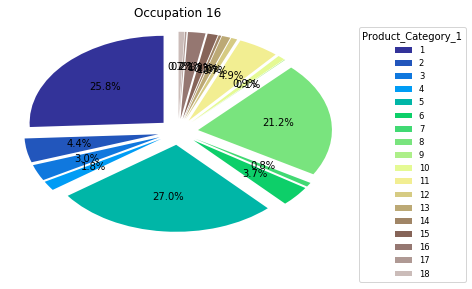

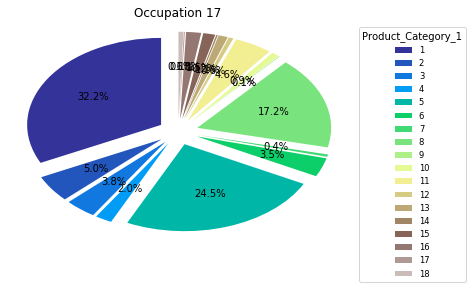

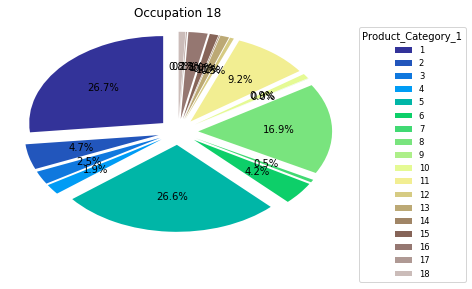

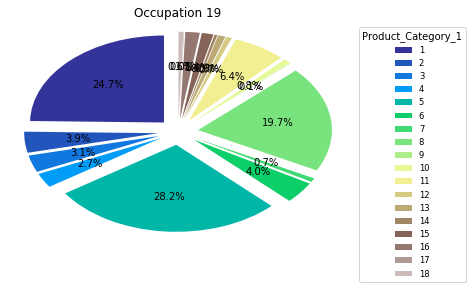

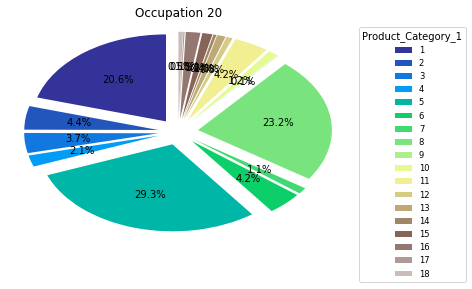

In [69]:
fig = plt.figure()
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
cmap = plt.get_cmap('terrain')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]
plotFor = "Occupation {0}"
title = 'Product_Category_1'
for i in range(21):
    explode = [0.15 for i in range(len(df_by_occupation_and_categories['Gender'][i].get_values()))]
    a = plt.pie(df_by_occupation_and_categories['Gender'][i].get_values(), radius=1, colors=colors,startangle=90,autopct='%1.1f%%',explode=explode)
    plt.legend(df_by_occupation_and_categories['Product_Category_1'][0].get_values(),loc='upper center',prop=fontP, bbox_to_anchor=(1.2, 1),title=title)
    plt.title(plotFor.format(i))
    plt.show()

Couple of observations from above charts:
1. Irrespective of occupation the proportion of products being purchased is generic. i.e. category 1, 5 are most bought by customers of any occupation and similary, 13-18 categories are bought in less numbers compared to other products.
2. If we look at category 1, it is most bought by customers with 8, 17, 5 occupations. This can be used when recommending a product on a platform where occupation of user is known. Similar observation can be done for other categories. Specially when we don't actually know what those categories represent, such relation can help understand user purchasing patterns based on an known attribute (e.g. occupation).

In [ ]:
1. 职业和购买商品的类别关系不大
2. 某些职业买某一类商品比较多，可以考虑做推荐